In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot

In [ ]:
dataframe=pd.read_csv('/content/csv_result-bone-marrow.csv')

In [ ]:
dataframe.head(5)

,id,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,1,22.830137,0,1,0,1,1,1,...,1,7.20,1.33876,5.38,35,19,51,32,999,0
1,2,1,0,23.342466,0,1,0,-1,-1,1,...,1,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,3,1,0,26.394521,0,1,0,-1,-1,1,...,1,7.94,19.01323,0.42,23.4,23,20,1000000,435,1
3,4,0,0,39.684932,1,1,0,1,2,1,...,?,4.25,29.481647,0.14,50,23,29,19,53,1
4,5,0,1,33.358904,0,0,0,1,2,0,...,1,51.85,3.972255,13.05,9,14,14,1000000,2043,0


In [ ]:
dataframe.describe()

,id,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,Riskgroup,Txpostrelapse,...,Recipientage10,Recipientageint,Relapse,aGvHDIIIIV,CD34kgx10d6,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,94.000000,0.598930,0.775401,33.472068,0.443850,0.598930,0.171123,0.390374,0.368984,0.122995,...,0.470588,1.224599,0.149733,0.786096,11.891781,26752.866310,90937.919786,775408.042781,938.743316,0.454545
std,54.126395,0.491431,0.418438,8.271826,0.498171,0.491431,0.377627,0.837632,0.483825,0.329313,...,0.500474,0.824904,0.357767,0.411161,9.914386,161747.200525,288242.407688,418425.252689,849.589495,0.499266
min,1.000000,0.000000,0.000000,18.646575,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.790000,9.000000,9.000000,10.000000,6.000000,0.000000
25%,47.500000,0.000000,1.000000,27.039726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.500000,0.000000,1.000000,5.350000,13.000000,16.000000,1000000.000000,168.500000,0.000000
50%,94.000000,1.000000,1.000000,33.550685,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,9.720000,15.000000,21.000000,1000000.000000,676.000000,0.000000
75%,140.500000,1.000000,1.000000,40.117809,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,2.000000,0.000000,1.000000,15.415000,17.000000,37.000000,1000000.000000,1604.000000,1.000000
max,187.000000,1.000000,1.000000,55.553425,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,57.780000,1000000.000000,1000000.000000,1000000.000000,3364.000000,1.000000


In [ ]:
column_list=list(dataframe.columns)

In [ ]:
dataframe.shape[1]

38

In [ ]:
for i in range (dataframe.shape[1]):
    dataframe[column_list[i]] = dataframe[column_list[i]].apply(lambda x: np.nan if x == '?' else x) 

In [ ]:
dataframe.isnull().sum()

id                       0
Recipientgender          0
Stemcellsource           0
Donorage                 0
Donorage35               0
IIIV                     0
Gendermatch              0
DonorABO                 0
RecipientABO             1
RecipientRh              2
ABOmatch                 1
CMVstatus               16
DonorCMV                 2
RecipientCMV            14
Disease                  0
Riskgroup                0
Txpostrelapse            0
Diseasegroup             0
HLAmatch                 0
HLAmismatch              0
Antigen                  1
Alel                     1
HLAgrI                   0
Recipientage             0
Recipientage10           0
Recipientageint          0
Relapse                  0
aGvHDIIIIV               0
extcGvHD                31
CD34kgx10d6              0
CD3dCD34                 5
CD3dkgx10d8              5
Rbodymass                2
ANCrecovery              0
PLTrecovery              0
time_to_aGvHD_III_IV     0
survival_time            0
s

#Variable 'survival_time'

In [ ]:
dataframe.survival_time.isnull().sum()

0

##Scatter Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


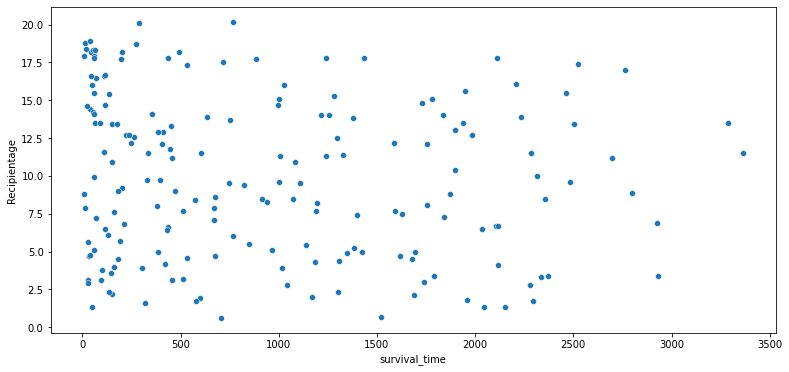

In [ ]:
fig,ax=plt.subplots(figsize=(13,6))
# Scatter plot
sns.scatterplot(dataframe.survival_time,dataframe.Recipientage)

##Box Plot


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


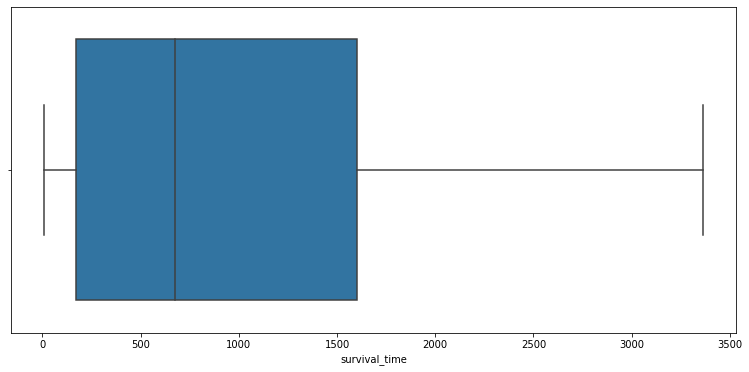

In [ ]:
fig,ax=plt.subplots(figsize=(13,6))
# Box plot
sns.boxplot(dataframe.survival_time)

##Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


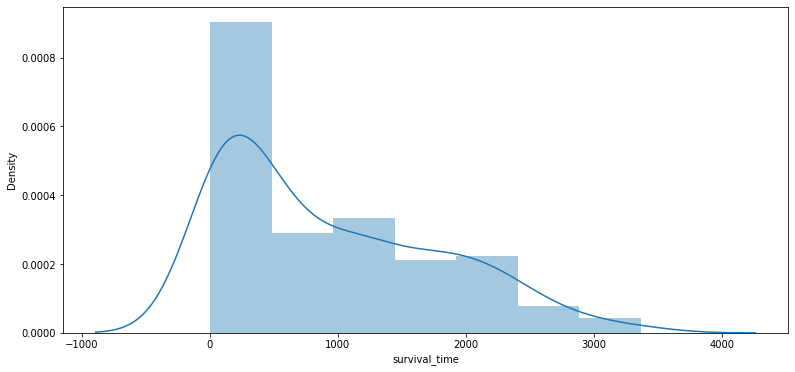

In [ ]:
fig,ax=plt.subplots(figsize=(13,6))
# Histogram
sns.distplot(dataframe.survival_time)

## Normal Assesment with QQ plot

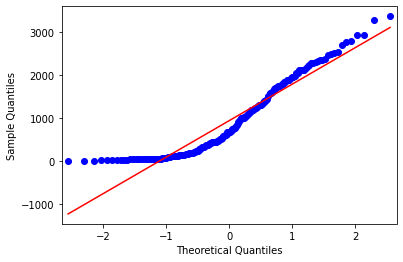

In [ ]:
# QQ Plot
qqplot(dataframe.survival_time, line='s')
plt.show()

It is not normal as it's histogram is not bell shaped and no straight line pattern

##Statistics

In [ ]:
dataframe.survival_time.describe()

count     187.000000
mean      938.743316
std       849.589495
min         6.000000
25%       168.500000
50%       676.000000
75%      1604.000000
max      3364.000000
Name: survival_time, dtype: float64

# Variable Rbodymass

In [ ]:
# check for null values
dataframe.Rbodymass.isnull().sum()

2

In [ ]:
dataframe['Rbodymass'] = dataframe['Rbodymass'].astype(float)

In [ ]:
# imputation
dataframe['Rbodymass']=dataframe['Rbodymass'].fillna(dataframe['Rbodymass'].mean())

In [ ]:
dataframe.Rbodymass.isnull().sum()

0

#Scatter Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


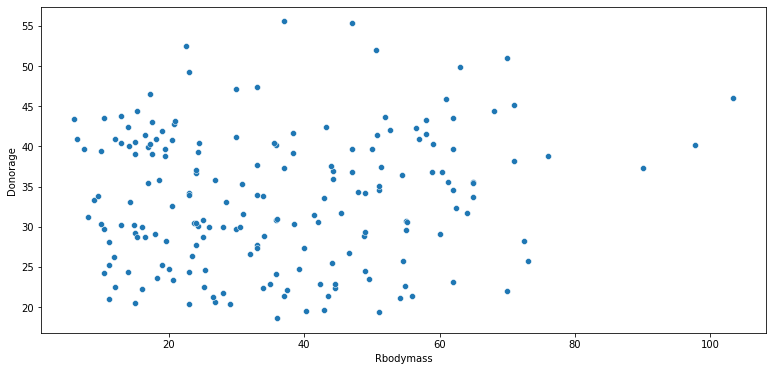

In [ ]:
fig,ax=plt.subplots(figsize=(13,6))
# Box plot
sns.scatterplot(dataframe.Rbodymass,dataframe.Donorage)

#Box Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


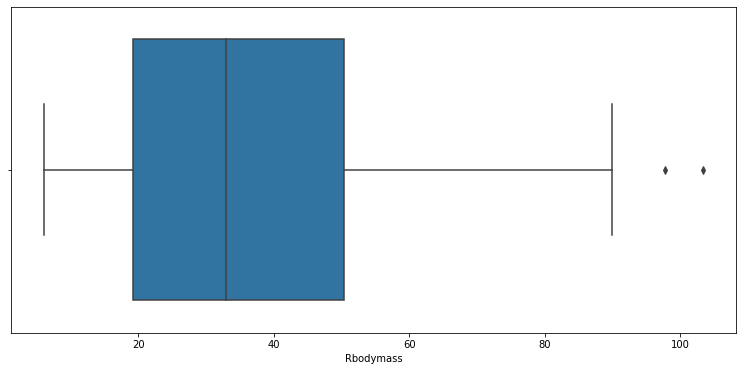

In [ ]:
fig,ax=plt.subplots(figsize=(13,6))
# Box plot
sns.boxplot(dataframe.Rbodymass)

##Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


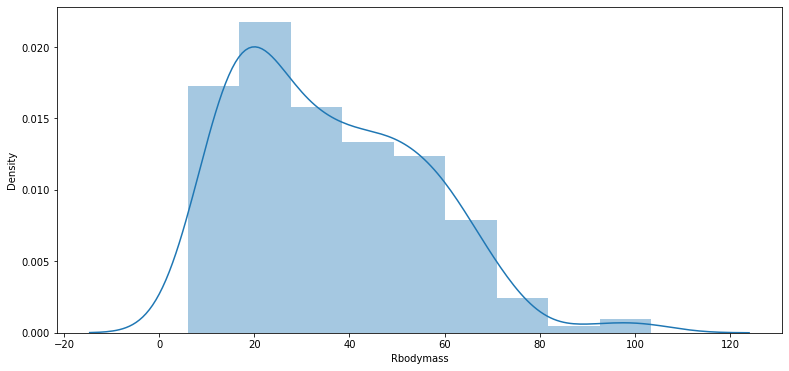

In [ ]:
fig,ax=plt.subplots(figsize=(13,6))
# Histogram
sns.distplot(dataframe.Rbodymass)

##Normal Assessment with QQ plot

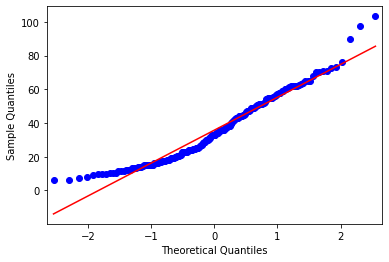

In [ ]:
# QQ Plot
qqplot(dataframe.Rbodymass, line='s')
plt.show()

It is not normal as it's histogram is not bell shaped and no straight line pattern

##Statistics

In [ ]:
dataframe.Rbodymass.describe()

count    187.000000
mean      35.801081
std       19.544986
min        6.000000
25%       19.250000
50%       33.000000
75%       50.300000
max      103.400000
Name: Rbodymass, dtype: float64